In [29]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

In [30]:
from sklearn.datasets import load_files
import numpy as np

train_dir = r'C:/Users/polit/OneDrive/Desktop/fruits-machine/Training'
test_dir = r'C:/Users/polit/OneDrive/Desktop/fruits-machine/evaluation1'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  4956
Testing set size :  1659


In [31]:
no_of_classes = len(np.unique(y_train))
no_of_classes

10

In [32]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [33]:
from sklearn.model_selection import  train_test_split
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [34]:
x_valid.shape, y_valid.shape

((332,), (332, 10))

In [35]:
x_test.shape,y_test.shape

((1327,), (1327, 10))

In [36]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (4956, 100, 100, 3)
Validation set shape :  (332, 100, 100, 3)
Test set shape :  (1327, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [37]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)       

In [39]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_fruits_2.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [40]:

model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [41]:

learned_weights = ModelCheckpoint(filepath = 'C:/Users/polit/OneDrive/Desktop/fruits-machine/fruits_360_weights_1.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 50,
        epochs=10,
        validation_data=(x_valid, y_valid),
        callbacks = [learned_weights],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 7.48660, saving model to C:/Users/polit/OneDrive/Desktop/fruits-machine\fruits_360_weights_1.hdf5
100/100 - 57s - loss: 0.4773 - accuracy: 0.8983 - val_loss: 7.4866 - val_accuracy: 0.0873
Epoch 2/10

Epoch 00002: val_loss did not improve from 7.48660
100/100 - 57s - loss: 0.0217 - accuracy: 0.9931 - val_loss: 9.7364 - val_accuracy: 0.0873
Epoch 3/10

Epoch 00003: val_loss improved from 7.48660 to 7.19698, saving model to C:/Users/polit/OneDrive/Desktop/fruits-machine\fruits_360_weights_1.hdf5
100/100 - 56s - loss: 0.0087 - accuracy: 0.9968 - val_loss: 7.1970 - val_accuracy: 0.1657
Epoch 4/10

Epoch 00004: val_loss improved from 7.19698 to 2.94672, saving model to C:/Users/polit/OneDrive/Desktop/fruits-machine\fruits_360_weights_1.hdf5
100/100 - 57s - loss: 0.0077 - accuracy: 0.9984 - val_loss: 2.9467 - val_accuracy: 0.4458
Epoch 5/10

Epoch 00005: val_loss improved from 2.94672 to 0.29242, saving model to C:/Users/polit/OneDrive/De

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_weights_1.hdf5')

In [43]:

accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy[1])

1.0


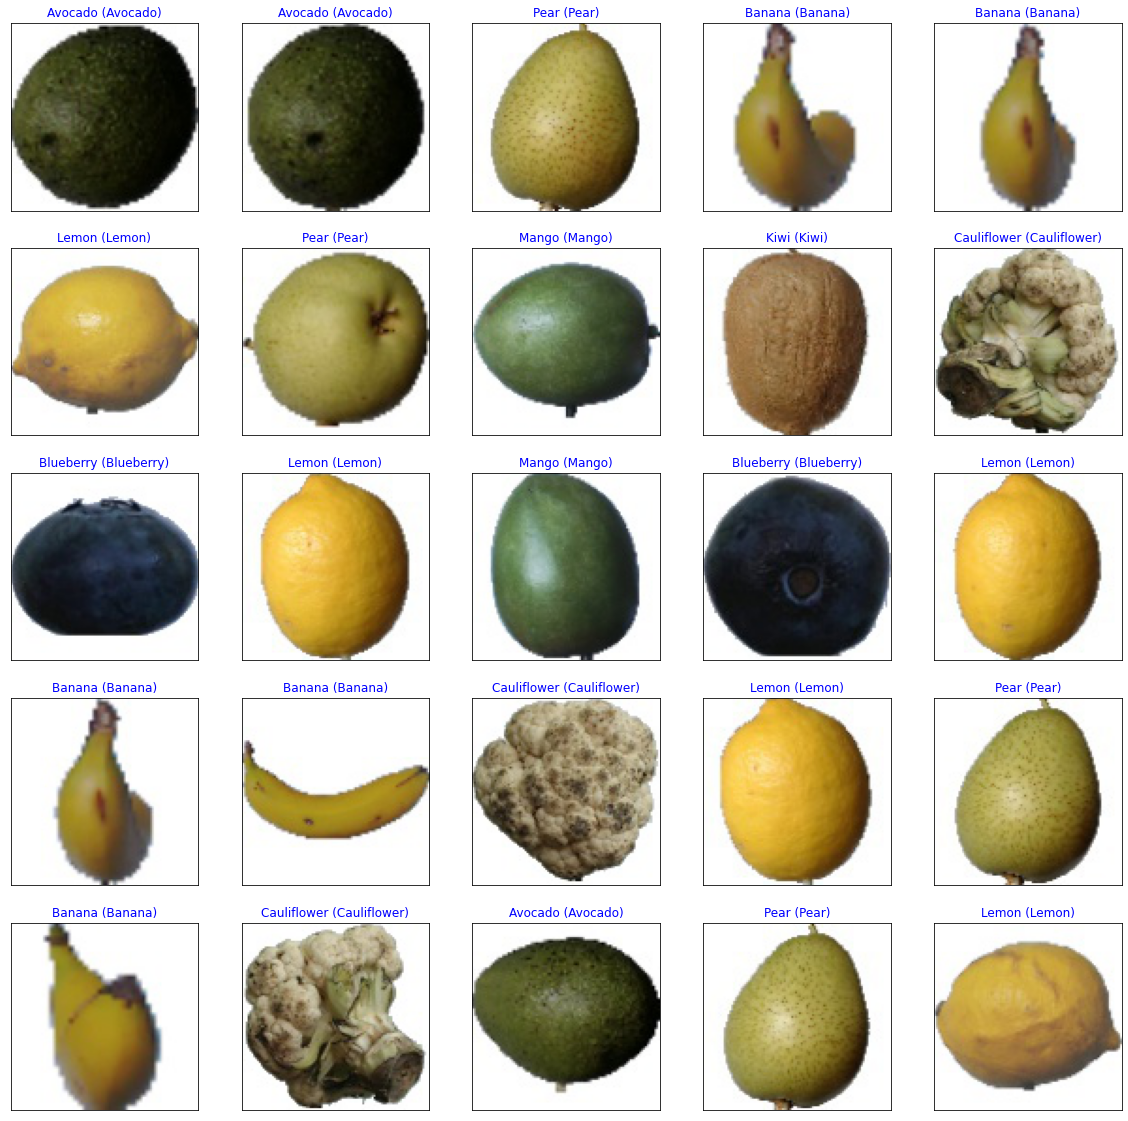

In [44]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "black"))